In [1]:
from functools import reduce
from datetime import timedelta
import time
import math

In [2]:
class Student:
    """Represents a student.
    
    Attributes
    ----------
    name : str
        full name of the student.
    grades : []
        a list of grades that the student obtained.
    """
    def __init__(self, name, grades):
        self.name = name
        self.grades = grades
        
    def avg_grade(self):
        total = reduce(lambda a, b: a + b, self.grades)
        
        return total / len(self.grades)
    
    def __lt__(self, other):
        return self.avg_grade() < other.avg_grade()
    
    def __le__(self, other):
        return self.avg_grade() <= other.avg_grade()
    
    def __gt__(self, other):
        return self.avg_grade() > other.avg_grade()
    
    def __ge__(self, other):
        return self.avg_grade() >= other.avg_grade()
    
    def __eq__(self, other):
        return self.avg_grade() == other.avg_grade()
    
    def __repr__(self):
        return f"Name: {self.name}. Average Grade: {round(self.avg_grade(),2)}"

In [8]:
students =[]
with open('ApplicantsInfo.txt', 'r') as file:
   
    n_applications, n_exams = map(int, file.readline().split())
    
    for _ in range(n_applications):
        student_info = file.readline().split()
    
        student_name = ' '.join(student_info[:2])
        student_marks = list(map(int, student_info[2:]))

        student = Student(student_name, student_marks)
        students.append(student)

In [9]:
students

[Name: Richard Scott. Average Grade: 23.83,
 Name: Paula Ahmadi. Average Grade: 24.02,
 Name: Arthur Richardson. Average Grade: 23.77,
 Name: Vonda Duncan. Average Grade: 24.2,
 Name: Stephanie Ibrahim. Average Grade: 24.05,
 Name: Francis Lomax. Average Grade: 23.94,
 Name: Edna Walbridge. Average Grade: 24.15,
 Name: Ruth Ortega. Average Grade: 23.78,
 Name: Carla Frazier. Average Grade: 23.95,
 Name: Edwin Borders. Average Grade: 23.91,
 Name: Robert White. Average Grade: 23.87,
 Name: Dorothy Halloran. Average Grade: 23.7,
 Name: William Bland. Average Grade: 24.06,
 Name: Martha Piercy. Average Grade: 23.79,
 Name: Jason Cook. Average Grade: 24.03,
 Name: Gene Gold. Average Grade: 23.98,
 Name: Margaret Dolphin. Average Grade: 24.05,
 Name: Mary Brothers. Average Grade: 24.0,
 Name: Shelley Tuttle. Average Grade: 23.85,
 Name: Otis Hicks. Average Grade: 23.99,
 Name: Leonard Buck. Average Grade: 24.26,
 Name: Louise Davis. Average Grade: 23.73,
 Name: Debra Amato. Average Grade: 2

In [10]:
def bubble_sort(arr):
    """In place implementation of bubble sort O(n^2)."""
    for i in range(len(arr)):
        
        for j in range(len(arr) - i - 1):
            
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

In [11]:
def merge(arr, left, middle, right):
    """Merges two arrays"""
    
    # Get all items belonging to the left and right arrays
    left_arr = [arr[left + i] for i in range(middle - left + 1)]
    right_arr = [arr[middle + 1 + i] for i in range(right - middle)]

    # indeces to keep track of
    main_index = left
    left_index = 0
    right_index = 0

    while len(left_arr) > left_index and len(right_arr) > right_index:

        left = left_arr[left_index]
        right = right_arr[right_index]

        if left < right:
            arr[main_index] = left
            left_index += 1

        else:
            arr[main_index] = right
            right_index += 1

        main_index += 1
    
    # add items that are leftover in the left array
    while left_index < len(left_arr):
        arr[main_index] = left_arr[left_index]
        main_index += 1
        left_index += 1

    # add items that are leftover in the right array
    while right_index < len(right_arr):
        arr[main_index] = right_arr[right_index]
        main_index += 1
        right_index += 1

In [12]:
def merge_sort(arr, left, right):
    """In place implementation of merge sort."""
    if left < right:
        middle = (left + right) // 2
        
        # sort the left part of the array
        merge_sort(arr, left, middle)
        
        # sort the right part of the array
        merge_sort(arr, middle + 1, right)
        
        # merge the two sorted arrays
        merge(arr, left, middle, right)
    

In [13]:
import random 
def quick_sort(arr):

    if len(arr) == 0 or len(arr)==1:
        return arr
    else:
        idx = random.randint(0,len(arr) -1)
        arr_1=partion_1(arr, idx)
        arr_2=partion_2(arr, arr[idx])
        a_1=quick_sort(arr_1)
        a_2=quick_sort(arr_2)
    return a_1 + [arr[idx]] + a_2
       

In [14]:
def partion_1(a,pivot):
    arr=[]
    for i,l in enumerate(a):
        if l <= a[pivot] and i != pivot:
            arr.append(l)
            
    return arr

In [15]:
def partion_2(a,pivot):
    arr=[]
    for x in a:
        if x > pivot:
            arr.append(x)
            
    return arr

In [ ]:
quick_sort(students)[::-1]

In [ ]:
merge_sort(students,0 , len(students)-1)
students[::-1]

In [ ]:
bubble_sort(students)
students[::-1]

In [17]:
def quick_time(nu):
    start_time = time.monotonic()
    quick_sort(students[:nu])
    end_time = time.monotonic()
    return end_time - start_time

In [18]:
def merge_time(nu):

    start_time = time.monotonic()
    merge_sort(students[:nu], 0, len(students[:nu])-1) 
    end_time = time.monotonic()
    return end_time - start_time
    

In [19]:
def bubble_time(nu):
    start_time = time.monotonic()
    bubble_sort(students[:nu])
    end_time = time.monotonic()
    return end_time - start_time
    

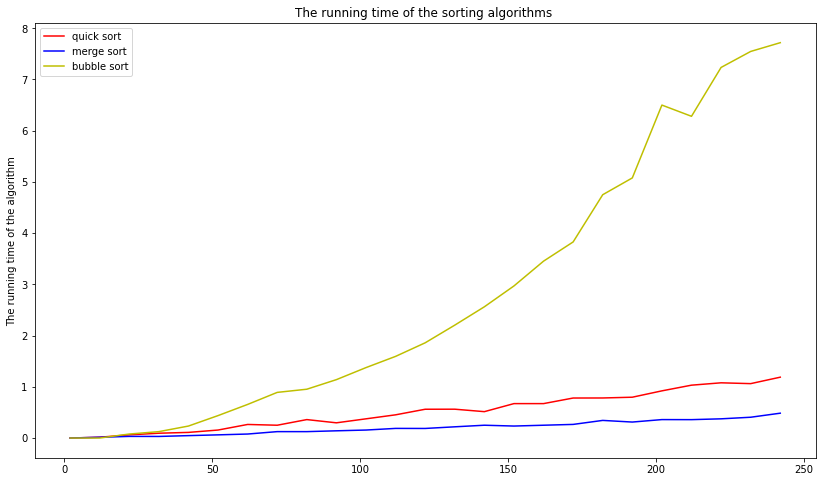

In [21]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import timeit

ns1 = range(2, 250, 10)
q_time = [quick_time(n) for n in ns1 ]
m_time = [merge_time(n) for n in ns1 ]
b_time = [bubble_time(n) for n in ns1 ]

figure(figsize=(14, 8))
plt.plot(ns1, q_time, '-r', label= 'quick sort')
plt.plot(ns1, m_time, '-b', label= 'merge sort')
plt.plot(ns1, b_time, '-y', label= 'bubble sort')


plt.xlabel('') 
plt.ylabel('The running time of the algorithm') 
plt.title('The running time of the sorting algorithms ')
plt.legend()
plt.show()

# Computational Cost

## Merge Sort
The computational time of the Merge sort is $\theta(n log(n))$.

The idea behind the merge sort is to divide the problems into subproblems, solve them and combine the solutions.

The array of size n will be divided into two arrays of size n/2, these two array will be divided further into 4 arrays of size n/4, and so on until each subarray reach a single element. Then we combine all the arrays in a way that results are sorted.

The computational cost can be splitted in two parts:

* The cost of recursevely sort an array of size 
* The cost of combine two array into one



Time complexity in the worst case:

\begin{cases}
  T(n)  = c if n = 1\\
  T(n)  = 2 T(\frac{n}{2}) + 2cn \hspace{0.5cm}   if n \geq 1 
\end{cases}

$ T(n) = 2 T(\frac{n}{2}) + 2cn $  Cost at level 1


$ 4 T(\frac{n}{4}) + 4 + 4cn   $

in general:

$$ T(\frac{n}{2^{k}}) = 2^{k} T(\frac{n}{2^{k}}) + kcn $$


it will end when $\frac{n} {2^{k}} $ is equal to 1 , $k = \log(n) $

it will get:

$$ T(n) = 2^{log(n)} T(1) + log(n) cn + c $$

since $T(1) = c$  and $ 2^{log(n)} = n$ time complexity will be : 

$$ T(n) = \Theta(n + nlog(n)) =\Theta(n log(n)) $$


The computational time of the merge sort is the same in the best, worst or random case. 





## Bubble Sort

The time complexity of the Bubble sort is $\Theta(N^2)$.

Bubble sort is a simple sorting algorithm that goes through the elements of the list and compares the current element with the one after it, then if the first one is bigger it swaps the two. After the first iteration we have the bigger element of the list in the last position. 

So in general, in the $i^{th}$ iteration we go through the elements of the list and we swap as needed up until the $(N-i)^{th}$ element. After N iterations we obtain the sorted list.

```python
    for i in range(len(arr)):                               #N times (N=length of arr)
        for j in range(len(arr) - i - 1):                   #N-i-1 times, i=0,...,N
            if arr[j] > arr[j + 1]:                         #θ(1)
                arr[j], arr[j + 1] = arr[j + 1], arr[j]     #θ(1)
```

When we apply the Bubble sort to a vector of size N we repeat the first 'for loop' N times while the second 'for loop' is repeated N-i-1 times (with i$\in${0,...,N}). The time complexity of the lines inside the second 'for loop' is $\Theta(1)$. 

So the time complexity of the Bubble sort is $$T(N)=N \cdot (N-i-1) \cdot \Theta(1)=N \cdot \Theta(N)= \Theta(N^2)$$.

## Quick sort
The time complexity of the Quicksort is, on average, $\Theta(N \cdot log(N))$ while in the worst case the time complexity is $\Theta(N^2)$.

Quicksort works by selecting a random 'pivot' element from the list and partitioning the other elements into two sub-lists, the first list containing the elements smaller than the pivot, the second one containing the largest elements. The sub-lists are then sorted recursively. 

The time complexity of the base case is $\Theta(1)$.

In the worst case:

$T(N)=\Theta(N)+ T(N-1) \hspace{0.5cm}   if\ n > 1$

$T(N) = \Theta(N)+ T(N-1)= \Theta(N)+ \Theta(N-1)+ T(N-2)= \sum_\limits{k=0}^{N-1} \Theta(N) +T(1)= \Theta(N^2)$

The worst case occurs when one of the sub-lists is of size N-1. This happens when the pivot is the smallest or the largest element in the list. If this happens repeatedly in each partition the time complexity would be $\Theta(N^2)$.

In the average case:

$T(N)=\Theta(N)+ 2 \cdot T(\frac{N}{2}) \hspace{0.5cm}   if\ n > 1$

We know that as in the Merge sort, in this case, $T(N)=\Theta(N \cdot log(N))$.

In the average case, each time we perform a partition we divide the list into two sub-lists with lenght around $\frac{N}{2}$.

## The most optimal algorithm

* Regarding computational time:

Merge sort is the best algorithm we can choose, by the way, quick sort and merge sort have the same behavior as $\Theta(nlog(n))$.
The point is that the efficiency of quicksort is extremely related to how we select the pivot. If the partitions created are very unbalanced, quicksort becomes very slow and inefficient.

Basically, the main idea is the same, both algorithms partition the array, merge sort always of size $\frac{n}{2}$ while quick sort doesn't necessarily do that.

Merge sort performs fewer comparisons than Quicksort in both the average and worst cases.

* Regarding space requirements:

Merge sort requires creating subarrays in addition to the original array. and hence, the algorithm must create n items in memory. Therefore, the complexity of the space is $\Theta(n)$

Quicksort is an in-place sorting algorithm. Its memory complexity is O(1).

* In conclusion:

Merge sort is very efficient for any particular list, but if the cost of allocating new memory is very high, we should always prefer quicksort.

Quicksort is very efficient at sorting small datasets. If the dataset to be sorted is too large to fit in memory all at once, using quicksort would not be possible.